<a href="https://colab.research.google.com/github/rishita2005/Assignment-DAI/blob/main/DAI_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DAI Assignment 2**||
Rishita Rathi||
23322026||
Economics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('/tips (data for regression problem).csv')

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


***Data pre-processing ***

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [6]:
df['sex'].unique()




array(['Female', 'Male'], dtype=object)

In [7]:
df['smoker'].unique()


array(['No', 'Yes'], dtype=object)

In [8]:

df['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [9]:

df['day'].unique()


array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [10]:
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})
df['smoker'] = df['smoker'].map({'No': 0, 'Yes': 1})
df['time'] = df['time'].map({'Lunch': 0, 'Dinner': 1})
df['day'] = df['day'].map({'Thur': 0, 'Fri': 1, 'Sat': 2, 'Sun': 3})

In [11]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,3,1,2
1,10.34,1.66,0,0,3,1,3
2,21.01,3.50,0,0,3,1,3
3,23.68,3.31,0,0,3,1,2
4,24.59,3.61,1,0,3,1,4


In [12]:
df['time'] = pd.to_datetime(df['time'])

In [14]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   total_bill  244 non-null    float64       
 1   tip         244 non-null    float64       
 2   sex         244 non-null    int64         
 3   smoker      244 non-null    int64         
 4   day         244 non-null    int64         
 5   time        244 non-null    datetime64[ns]
 6   size        244 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 13.5 KB


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['time'] = le.fit_transform(df['time'])
df = pd.get_dummies(df, columns=['day'], drop_first=True)

In [16]:
df.head()

,total_bill,tip,sex,smoker,time,size,day_1,day_2,day_3
0,16.99,1.01,1,0,1,2,False,False,True
1,10.34,1.66,0,0,1,3,False,False,True
2,21.01,3.50,0,0,1,3,False,False,True
3,23.68,3.31,0,0,1,2,False,False,True
4,24.59,3.61,1,0,1,4,False,False,True


In [17]:
X = df.drop('tip', axis=1).values
y = df['tip'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


***Linear Regression ***

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)


r2 = r2_score(y_test, y_pred)
print(f"Linear Regression - MAE: {mae:.3f}, R²: {r2:.3f}")

Linear Regression - MAE: 0.667, R²: 0.437


**Ridge Regularization**

In [19]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - MAE: {mae_ridge:.3f}, R²: {r2_ridge:.3f}")


Ridge Regression - MAE: 0.667, R²: 0.439


**Lasso Regularization**

In [20]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression - MAE: {mae_lasso:.3f}, R²: {r2_lasso:.3f}")

Lasso Regression - MAE: 0.626, R²: 0.547


**Decision Tree Regression**

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree Regression - MAE: {mae_tree:.3f}, R²: {r2_tree:.3f}")

Decision Tree Regression - MAE: 0.787, R²: 0.143



**Support Vector Regression**

In [22]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

y_pred_svr = svr_model.predict(X_test)

mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Support Vector Regression (SVR) - MAE: {mae_svr:.3f}, R²: {r2_svr:.3f}")

Support Vector Regression (SVR) - MAE: 0.566, R²: 0.575


**Random Forest Regressor**

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression - MAE: {mae_rf:.3f}, R²: {r2_rf:.3f}")


Random Forest Regression - MAE: 0.771, R²: 0.247


***KNN ***

In [24]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"K-Nearest Neighbors Regression (KNN) - MAE: {mae_knn:.3f}, R²: {r2_knn:.3f}")

K-Nearest Neighbors Regression (KNN) - MAE: 0.705, R²: 0.308


**Multiple Linear Regression(Total bill , Size)**

In [39]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = df[['total_bill', 'size']]
y = df['tip']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 0.8428629382112997
R-squared (R²): 0.3605903119796181


 ***Checking if the data follows a linear trend using following methods- ***

***Scatter plot ***

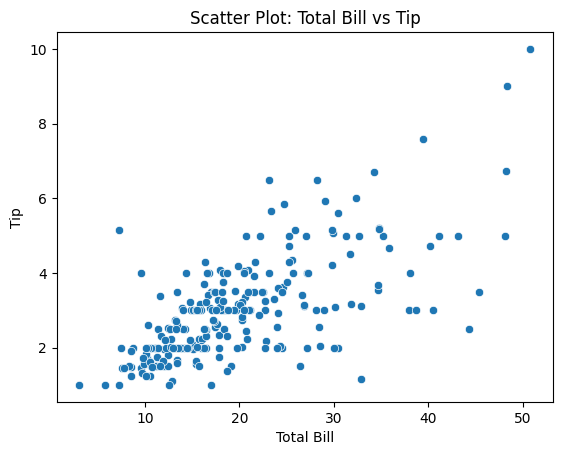

In [25]:
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Scatter Plot: Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

Seeing the plot , we can say that there is a positive relation between Tip and Total bill.

**Pairplot**

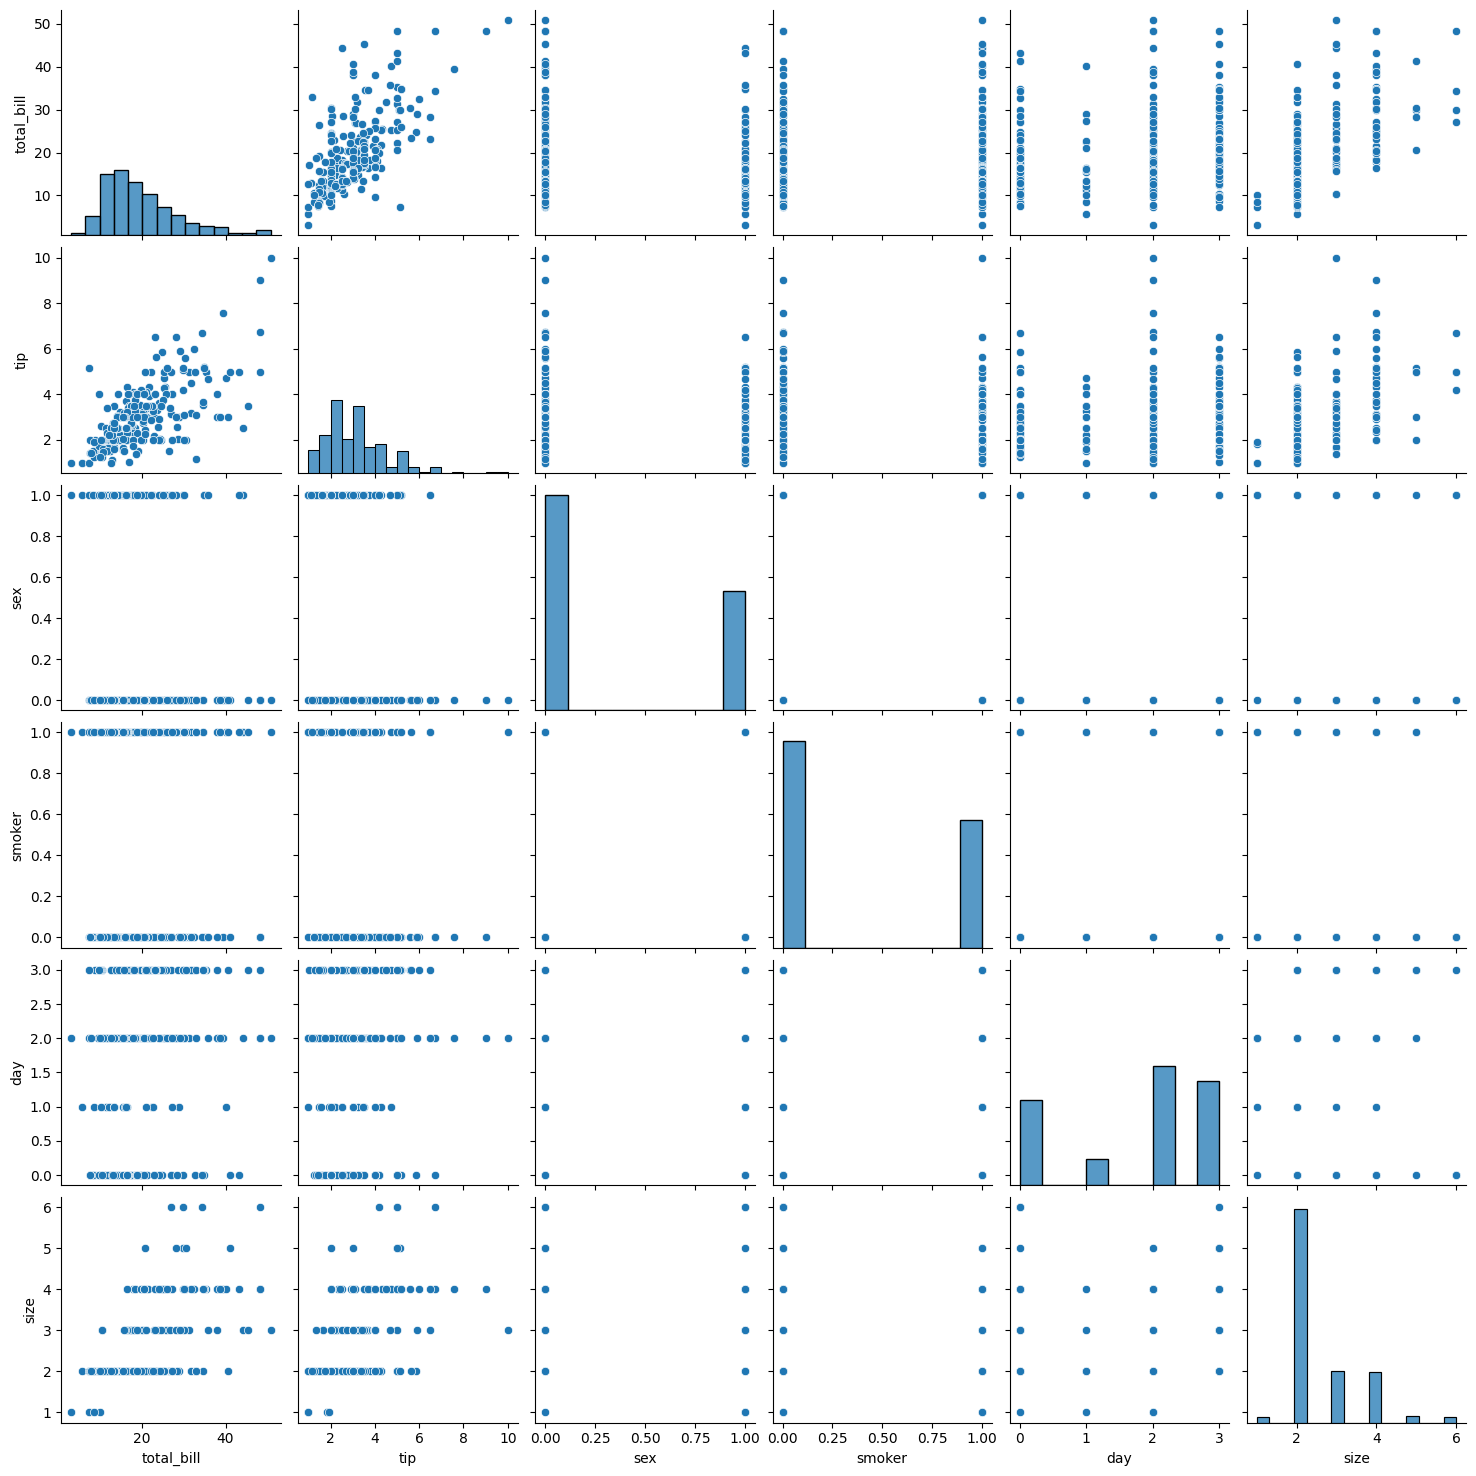

In [ ]:
sns.pairplot(df)
plt.show()

The distribution  for total bill and tip appears to be right-skewed, indicating that most bills and tips are relatively small, with a few larger bills and tips.


**Heatmap**

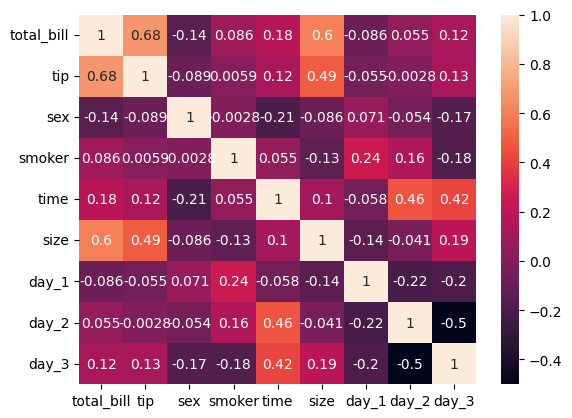

In [26]:

sns.heatmap(df.corr(), annot=True)
plt.show()

Strong Correlation:

1. Total_bill and tip have a high positive correlation of 0.68.
2. Total_bill and size also have a moderate correlation of 0.6, suggesting that larger group sizes are generally associated with higher bills.

Moderate Correlations:

1. size has a moderate correlation with tip (0.49), indicating that group size influences tipping to some extent

Weak Correlations:

1. Most other correlations (such as sex, smoker, day, time) with tip are weak, implying that these variables may not add significant predictive power for tipping behavior.

***Rainbow test ***

In [31]:
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow

model = ols('tip ~ total_bill + size + sex + smoker + time + day_1+ day_2 + day_3', data=df).fit()

stat, p_value = linear_rainbow(model)

print(f"Rainbow Test Statistic: {stat:.3f}")
print(f"Rainbow Test p-value: {p_value:.3f}")

if p_value < 0.05:
    print("The p-value is low, suggesting that a linear model may not be a good fit.")
else:
    print("The p-value is high, suggesting that a linear model may be appropriate.")

Rainbow Test Statistic: 1.197
Rainbow Test p-value: 0.166
The p-value is high, suggesting that a linear model may be appropriate.


**Residuals Plot**

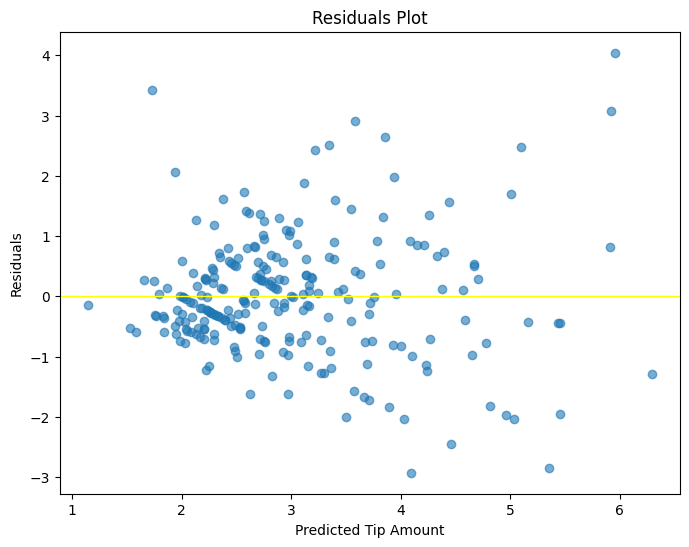

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


X = df[['total_bill', 'size']]
y = df['tip']
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred = linear_model.predict(X)
residuals = y - y_pred


plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='yellow', linestyle='-', linewidth=1)
plt.xlabel("Predicted Tip Amount")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

There’s no discernible pattern or trend in the residuals, which suggests that the model's assumptions hold true, and it does not consistently underestimate or overestimate the tip values.

**Sequential Tip Plot**(As it is not a time series data for making line plot)

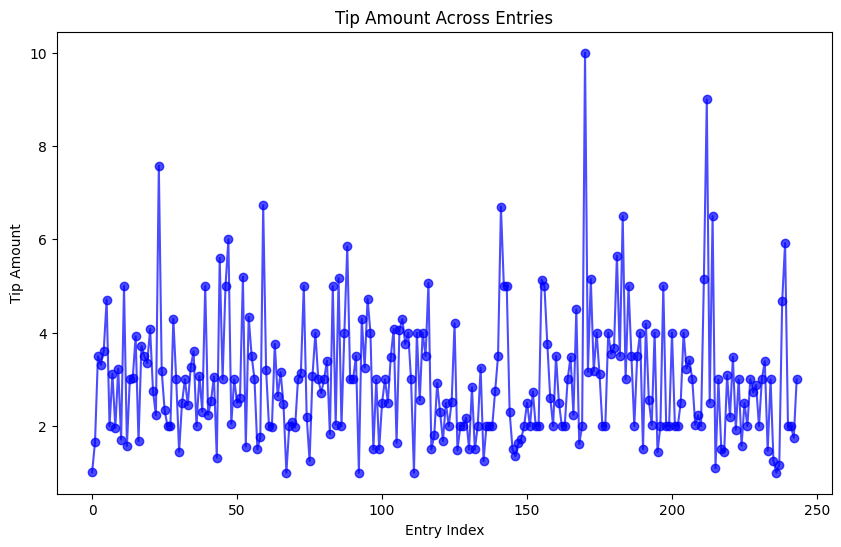

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['tip'], marker='o', linestyle='-', color='b', alpha=0.7)
plt.title("Tip Amount Across Entries")
plt.xlabel("Entry Index")
plt.ylabel("Tip Amount")
plt.show()

There isn’t a noticeable trend or consistent pattern in tip amounts across the entries , also few entries with unusually high tip amounts appear to be potential outliers.

**Best model**

** Based on the trend in data and Acuracy level suitable regression method would be- Support Vector Regression (SVR) and Lasso Regression as they have relatively high R² values and lower MAE scores, showing better prediction accuracy. **
.

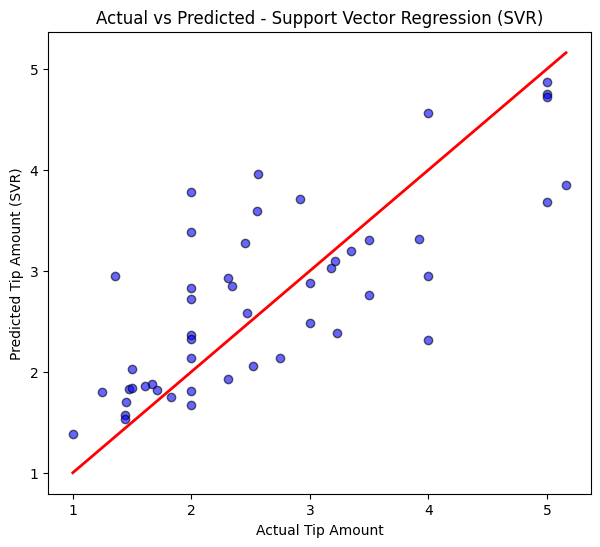

In [37]:
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_svr, color='blue', alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("Actual Tip Amount")
plt.ylabel("Predicted Tip Amount (SVR)")
plt.title("Actual vs Predicted - Support Vector Regression (SVR)")
plt.show()

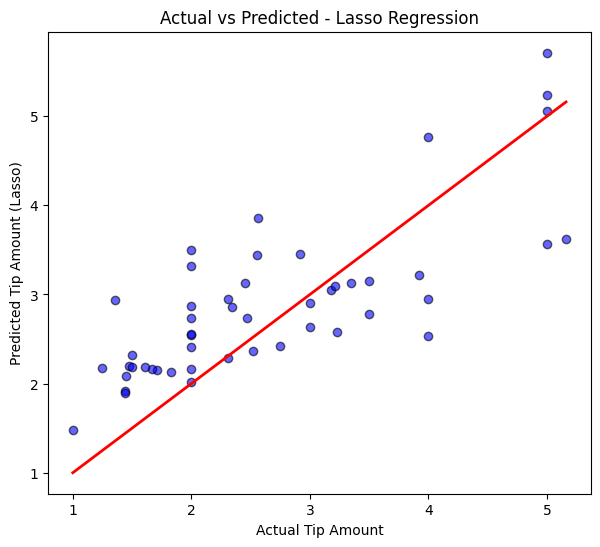

In [38]:
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_lasso, color='blue', alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("Actual Tip Amount")
plt.ylabel("Predicted Tip Amount (Lasso)")
plt.title("Actual vs Predicted - Lasso Regression")
plt.show()

In [ ]:
#completed